# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [2]:
# Importando as blibliotecas

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Exibe todas as expressões da célula

In [3]:
# Verificando o caminho e indicando o df

caminho = '.\\CREDIT_SCORE_PROJETO_PARTE1.csv'

if os.path.exists(caminho):
    print("O caminho foi encontrado!")
else:
    print("O caminho não foi encontrado.")

df = pd.read_csv(caminho, delimiter=';')

df.head(10)

O caminho foi encontrado!


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [5]:
# Verificando as informações

df.info()

# Fazendo as transformações necessárias

df["Income"] = df['Income'].str.replace(".", "").str.replace(",", "") # Tratando as vírgulas e pontos
df['Income'] = df['Income'].astype(float) # Income para float

# Verificando se os objetos possuem erros

df['Gender'].unique()
df['Education'].unique()
df['Marital Status'].unique()
df['Home Ownership'].unique()
df['Credit Score'].unique()

# Verificando se as alterações foram feitas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


array(['Female', 'Male'], dtype=object)

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

array(['Single', 'Married'], dtype=object)

array(['Rented', 'Owned'], dtype=object)

array(['High', 'Average', 'Low'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

Eu escolhi substituir pois haviam muitos dados nulos, e o dataframe é pequeno. Fiz a substituição com base na alta correalação, entre income e age, e elas fazem sentido.

Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64

A porcentagem de valores nulos em Age é:  20.73170731707317 %


np.float64(37.50769230769231)

np.float64(36.0)

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Age'>

Text(0.5, 1.0, 'Boxplot da Coluna Age')

Text(0, 0.5, 'Age')

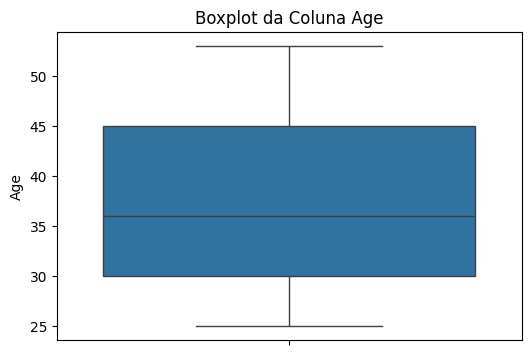

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de Correlação')

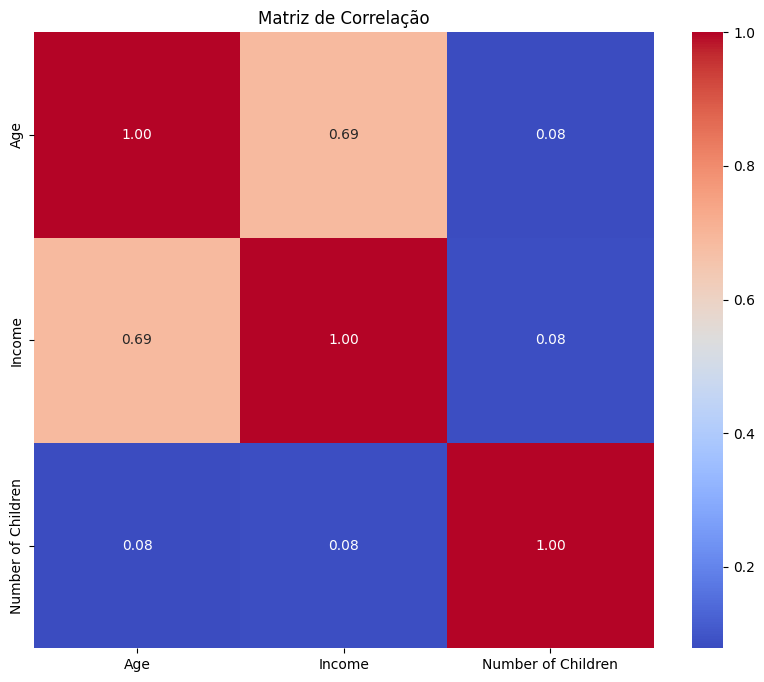

A media de idade abaixo da mediana de income é:  33.13636363636363
A media de idade acima da mediana de income é:  42.015625


Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
# Verificando se tem valores nulos

df.isnull().sum()
Nulos_Age = (df['Age'].isnull().sum() / len(df)) * 100
print("A porcentagem de valores nulos em Age é: ", Nulos_Age,"%")
# Há valores nulos na coluna Age, a quantidade é pequena, mas o número de dados no csv também é pequena, logo vou substituir ao invés de retirar já que retirar tiraria 20% dos dados de ma coluna que já não tem muitos dados.

# Fazendo uma análise para descobrir como vou trata-los

df['Age'].mean()
df['Age'].median()

# Plotando gráfico para descobrir se há outliers

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Age')
plt.title('Boxplot da Coluna Age')
plt.ylabel('Age')
plt.show()

# Verificicando se idade tem alguma correlação com outra variável para saber se posso fazer a substituição dos nulos pela média sem causar problemas

matriz_corr = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

# Há uma correlação forte age com income, logo, vou fazer uma substituição me baseando nisso. 

Meio_income = df['Income'].median()

media_age_baixo = df.loc[df['Income'] < Meio_income, "Age"].mean()
media_age_alto = df.loc[df['Income'] >= Meio_income, "Age"].mean()

print('A media de idade abaixo da mediana de income é: ', media_age_baixo)
print('A media de idade acima da mediana de income é: ', media_age_alto)

Age_na = df["Age"].isna()

df.loc[Age_na & (df["Income"] <  Meio_income), "Age"] = media_age_baixo
df.loc[Age_na & (df["Income"] >= Meio_income), "Age"] = media_age_alto

# Basicamente eu vi qual era a mediana de income, depois vi a média de Age quando a income era ebaixo da mediana e de wuando era acima, depois eu peguei onde era nulo, e para finalizar, onde era nulo, se fosse acima da mediana de income eu trocava pela media de age que era acima, se fosse abaixo, eu trocava pela media de Age que era abaixo.

# Verificando se as alterações funcionaram.

df.isnull().sum()

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [7]:
# Verificando se os dados categóricos possuem erros. (Resolvi normaliza-los também!)

df['Gender'] = df['Gender'].str.upper()
df['Gender'].unique()

df['Education'] = df['Education'].str.upper()
df['Education'].unique()

df['Marital Status'] = df['Marital Status'].str.upper()
df['Marital Status'].unique()

df['Home Ownership'] = df['Home Ownership'].str.upper()
df['Home Ownership'].unique()

df['Credit Score'] = df['Credit Score'].str.upper()
df['Credit Score'].unique()

array(['FEMALE', 'MALE'], dtype=object)

array(["BACHELOR'S DEGREE", "MASTER'S DEGREE", 'DOCTORATE',
       'HIGH SCHOOL DIPLOMA', "ASSOCIATE'S DEGREE"], dtype=object)

array(['SINGLE', 'MARRIED'], dtype=object)

array(['RENTED', 'OWNED'], dtype=object)

array(['HIGH', 'AVERAGE', 'LOW'], dtype=object)

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [8]:
df.describe()

,Age,Income,Number of Children
count,164.000000,1.640000e+02,164.000000
mean,37.575994,8.376524e+06,0.652439
std,7.829177,3.245731e+06,0.883346
min,25.000000,2.500000e+06,0.000000
25%,31.750000,5.750000e+06,0.000000
50%,36.000000,8.375000e+06,0.000000
75%,43.000000,1.050000e+07,1.000000
max,53.000000,1.625000e+07,3.000000


Resposta: Após a análise não foi apontado nenhum outlier, o number of childen tem um caso que se diferencia dos outros, mas não é nada alarmante, e é extremamente possível ter 3 filhos, não indicando nenhum tipo de erro de digitação ou coisa do tipo. O income a mesma coisa, apesar de ter valores altos e baixos, são todos valores possiveis e que estão dentro dos quandrantes. Conclusão, a principio, não é necessário se preocupar com outliers.

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Income'>

Text(0.5, 1.0, 'Boxplot da Coluna Income')

Text(0, 0.5, 'Age')

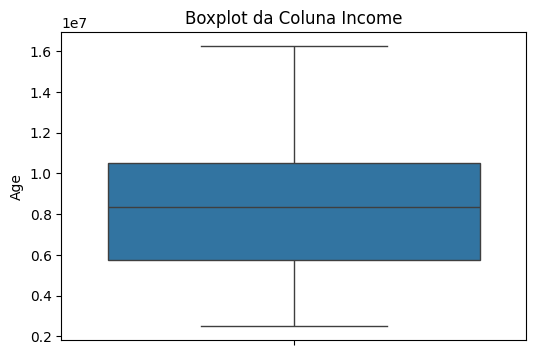

<Figure size 600x400 with 0 Axes>

<Axes: ylabel='Number of Children'>

Text(0.5, 1.0, 'Boxplot da Coluna Number of Children')

Text(0, 0.5, 'Age')

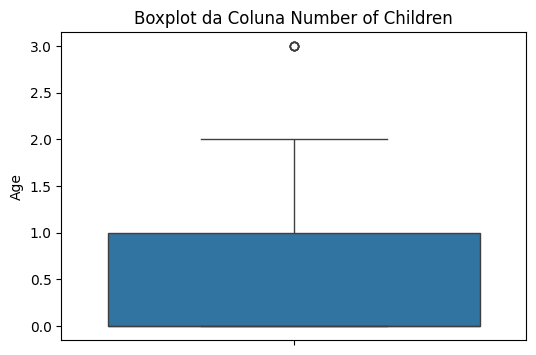

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Income')
plt.title('Boxplot da Coluna Income')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Number of Children')
plt.title('Boxplot da Coluna Number of Children')
plt.ylabel('Age')
plt.show()



**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

In [10]:
# Primeiro, info para verificar quais são as variáveis categóricas.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 164 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    float64
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 10.4+ KB


# Gender
Reposta: Em relação ao gender, está bem distribuido e balanceado, a quantidade de mulheres é bem próxima da quantidade de homens, o que é muito bom na hora de tirar insights quando fizermos a análise bivariada.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Gender'>

Text(0.5, 1.0, 'Distribuição dos clientes por gênero')

(array([0, 1]), [Text(0, 0, 'FEMALE'), Text(1, 0, 'MALE')])

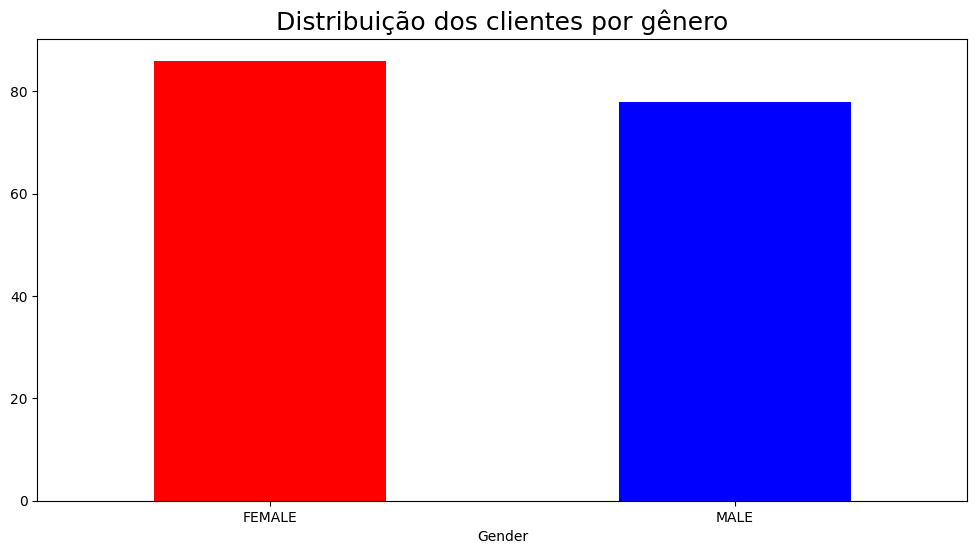

In [24]:
plt.figure(figsize=(12, 6))
df['Gender'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribuição dos clientes por gênero', fontsize=18)
plt.xticks(rotation=0)
plt.show()

# Education
Reposta: O gráfico mostra que a maioria dos clientes tem bacharel, e poucos tem associate's degre, a distribuição não é extremamente desigual mas é desigual, tendo categorias com valores bem superiores a outras. Essas informações serão valiosas quando compararmos com idade, coluna que provavelmente tem um relação direta.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Education'>

Text(0.5, 1.0, 'Distribuição dos clientes por nível de educação')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'HIGH SCHOOL DIPLOMA'),
  Text(1, 0, "ASSOCIATE'S DEGREE"),
  Text(2, 0, "BACHELOR'S DEGREE"),
  Text(3, 0, "MASTER'S DEGREE"),
  Text(4, 0, 'DOCTORATE')])

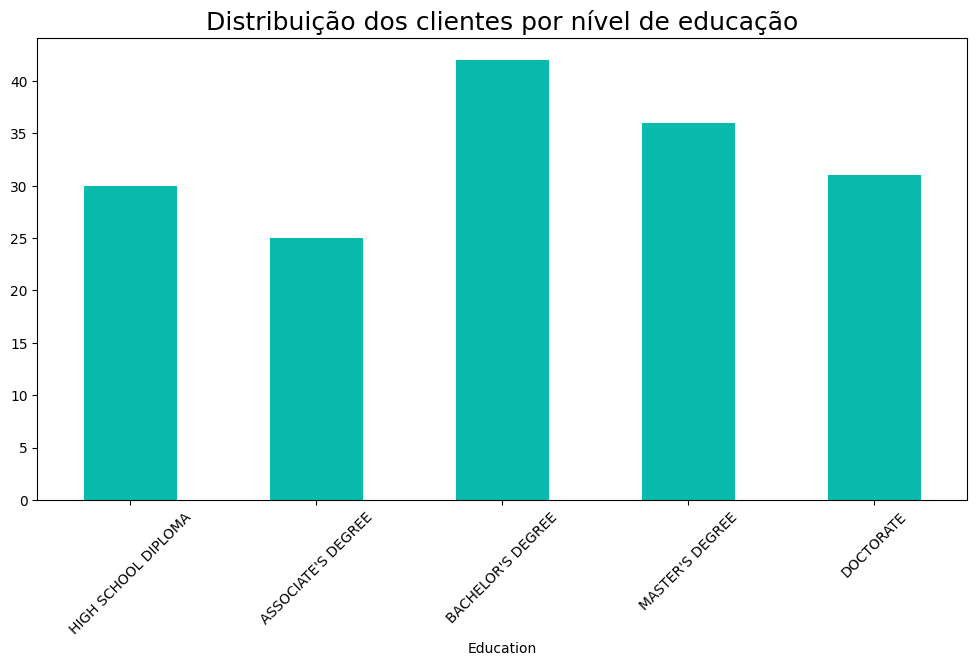

In [20]:
plt.figure(figsize=(12, 6))
education_order = [
    "HIGH SCHOOL DIPLOMA",
    "ASSOCIATE'S DEGREE",
    "BACHELOR'S DEGREE",
    "MASTER'S DEGREE",
    "DOCTORATE"
]
df['Education'].value_counts().reindex(education_order).plot(kind='bar', color="#09BBAC")
plt.title('Distribuição dos clientes por nível de educação', fontsize=18)
plt.xticks(rotation=45)
plt.show()

# Marital Status
Resposta: Após a análise, podemos ver que a maioria dos clientes é casado mas existe uma quantidade muito grande de clientes solteiros também, mostreando que é uma categoria relativamente bem distribuida. Isso é bom, pois na análise bivariada, qualquer difereça grande entre essa categoria e outra, mostra que uma correlação é bem possível.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Marital Status'>

Text(0.5, 1.0, 'Distribuição do estado civíl dos clientes')

(array([0, 1]), [Text(0, 0, 'MARRIED'), Text(1, 0, 'SINGLE')])

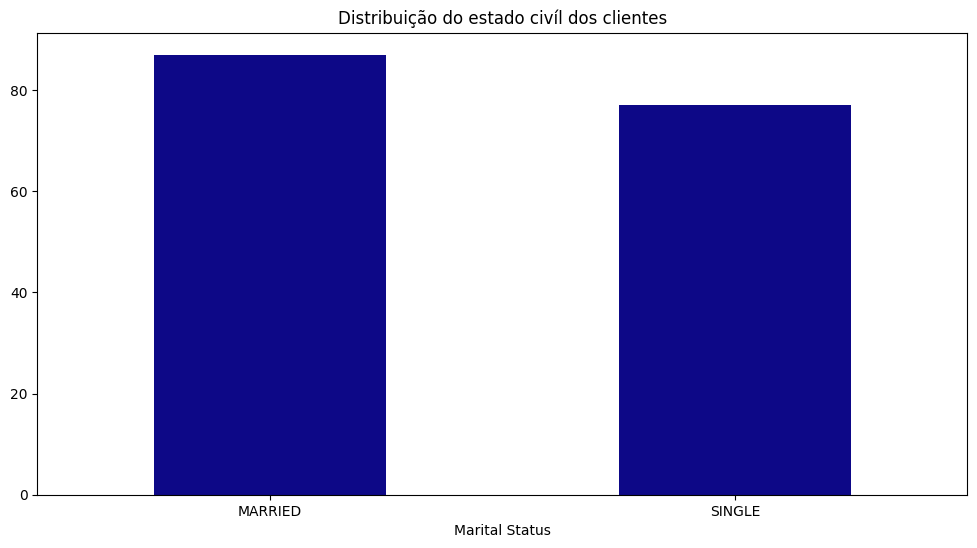

In [28]:
plt.figure(figsize=(12, 6))
df['Marital Status'].value_counts().plot(kind='bar', colormap='plasma')
plt.title("Distribuição do estado civíl dos clientes")
plt.xticks(rotation=0)
plt.show()

# Home Ownership
reposta: A maior parte dos clientes tem casa própria, o que normalmente indica uma situação financeira mais estável. Mesmo assim, tem bastante gente que mora de aluguel. Ter uma casa costuma ajudar no score de crédito, já que mostra responsabilidade e estabilidade. Mas concluindo, o gráfico apresenta uma destribuição bem desigual.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Home Ownership'>

Text(0.5, 1.0, 'Distribuição de clientes por casa própria')

(array([0, 1]), [Text(0, 0, 'OWNED'), Text(1, 0, 'RENTED')])

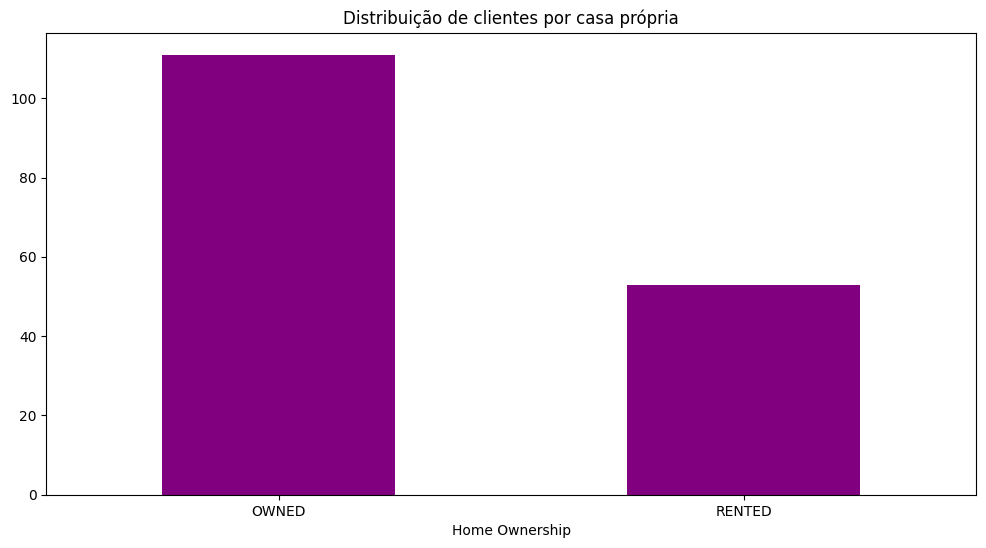

In [32]:
plt.figure(figsize=(12, 6))
df['Home Ownership'].value_counts().plot(kind='bar', color='purple')
plt.title("Distribuição de clientes por casa própria")
plt.xticks(rotation=0)
plt.show()

# Credit Score
Reposta: Essa é a coluna mais importante e merece muita atenção, a principio, a maioria dos clientes possui um credit score alto, o que é muito bom, ja que essa é a categoria dominante dessa coluna, ou seja, ela é uma coluna desbalanceada. Mas também mostra que será necessário tratamento futuro para modelos de machining learnig já que a quantidade de pessoas com score low é tão baixa que pode atrapalhar o aprendizado do modelo.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Credit Score'>

Text(0.5, 1.0, 'Distribuição de clientes por Credit Score')

(array([0, 1, 2]),
 [Text(0, 0, 'LOW'), Text(1, 0, 'AVERAGE'), Text(2, 0, 'HIGH')])

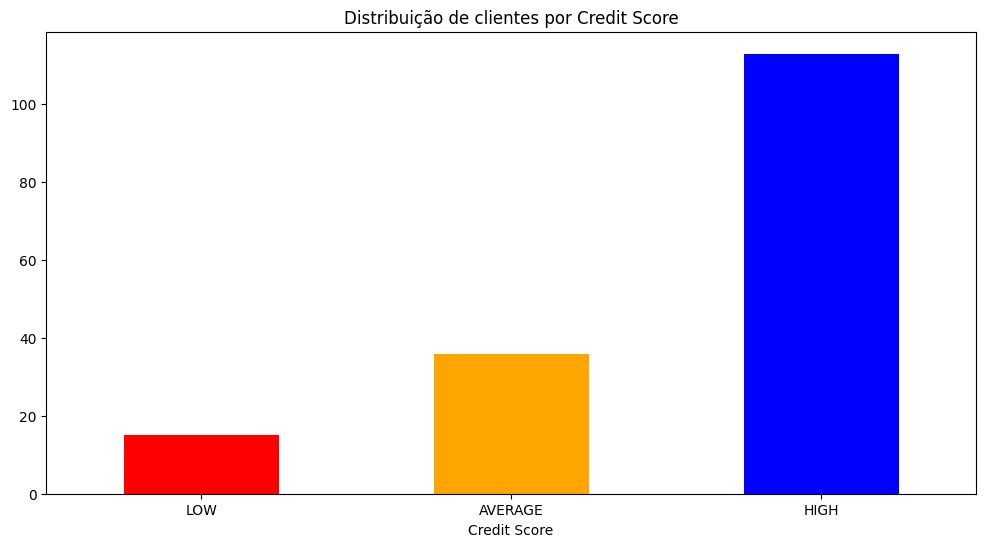

In [33]:
plt.figure(figsize=(12, 6))
score_order = ['LOW', 'AVERAGE', 'HIGH']
colors = ['red', 'orange', 'blue']
df['Credit Score'] = df['Credit Score'].str.upper()
df['Credit Score'].value_counts().reindex(score_order).plot(kind='bar', color=colors)
plt.title("Distribuição de clientes por Credit Score")
plt.xticks(rotation=0)
plt.show()

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Reposta: Não foi encontrado nenhum outlier e todos os dados aparentam ser bem plausíveis.

In [ ]:
# N/A

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [ ]:
#seu código aqui

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [ ]:
# seu código aqui

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [ ]:
#seu código aqui

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [ ]:
# sua justificativa aqui

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [ ]:
#seu código aqui

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

In [ ]:
#seu código aqui

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [ ]:
#seu código aqui

**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

In [ ]:
#seu código aqui

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [ ]:
#seu código aqui